## Logistic Regression/classification

We will be working on adult dataset of US census. Dataset can be obtained from 

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
The aim of this analysis is to find whether the salary is >$50K or <$50K

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataset doesn't have a header. So, obtained the header from the description

In [2]:
colmn=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']

In [118]:
adult=pd.read_csv('C:\\Users\\sagar\\Documents\\GitHub\\ML\\Classification_adult\\adult_train.txt',names=colmn,index_col=False)
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


removing the nulls. Waste of analysis

In [119]:
adult.replace(to_replace=' ?',value=np.NaN,inplace=True)
adult.dropna(subset=['workclass'],inplace=True)
adult.dropna(subset=['occupation'],inplace=True)
adult.dropna(subset=['native_country'],inplace=True)

In [92]:
adult.dtypes

age                    int64
workclass             object
fnlwgt                 int64
education             object
education_num          int64
marital_status        object
occupation            object
relationship          object
race                  object
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
salary                object
workclass_ind           int8
education_ind           int8
marital_status_ind      int8
occupation_ind          int8
relationship_ind        int8
race_ind                int8
native_country_ind      int8
salary_ind              int8
dtype: object

let's check the frequency of the column, i mean histogram/pie chart before going into further details

to ensure removing white space before the character data, we get the character columns and strip them off with any trailing or leading spaces

In [120]:
mylist = list(adult.select_dtypes(include=['object']).columns)
mylist

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [121]:
for i in mylist:
    adult[i]=adult[i].str.strip() #stripped the blank space. This helps in giving correct where conditions

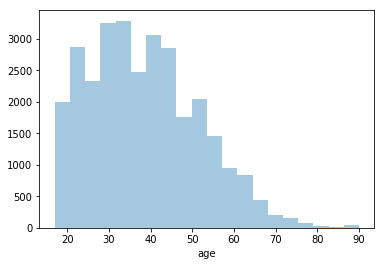

In [5]:
sns.distplot(adult['age'], bins=20, kde=False,rug=False)
plt.show()

In [122]:
adult['workclass_ind' ] =pd.Categorical(adult.workclass).codes
adult['education_ind' ] =pd.Categorical(adult.education).codes
adult['marital_status_ind' ] =pd.Categorical(adult.marital_status).codes
adult['occupation_ind' ] =pd.Categorical(adult.occupation).codes
adult['relationship_ind' ] =pd.Categorical(adult.relationship).codes
adult['race_ind' ] =pd.Categorical(adult.race).codes
adult['native_country_ind' ] =pd.Categorical(adult.native_country).codes
adult['salary_ind' ] =pd.Categorical(adult.salary).codes

inference: There are very less records from age 70 onwards. Can consider them as different set

In [111]:
def cntplt(var,dataset,hue_var):
    fig, ax = plt.subplots(figsize=(12,5))
    ax = sns.countplot(x=var, data=dataset,hue=hue_var)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

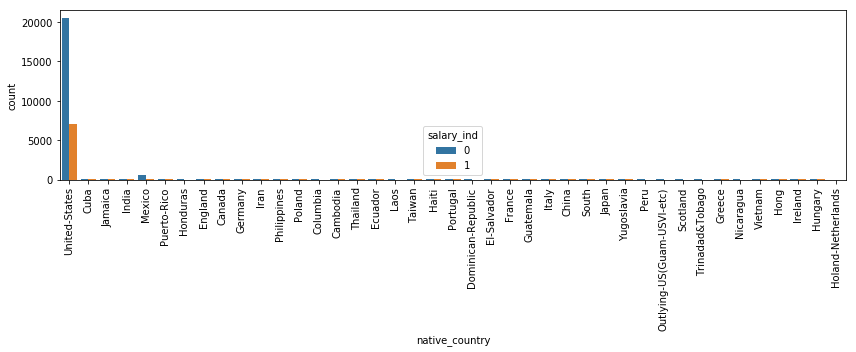

In [123]:
cntplt('native_country',adult,'salary_ind')

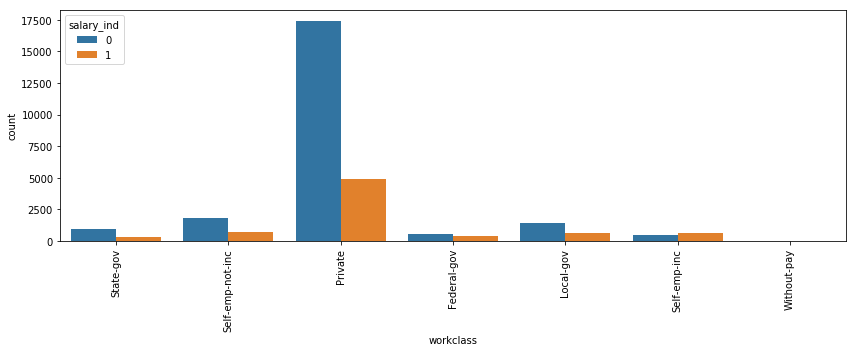

In [126]:
cntplt('workclass',adult,'salary_ind')

Removing the without pay category

In [ ]:
adult_new = adult[adult.workclass != 'Without-pay']

In [124]:
adult_US=adult_new[adult_new['native_country']=='United-States']
print(adult_US.shape)
adult_other=adult_new[adult_new['native_country']!='United-States']
print(adult_other.shape)

(27491, 23)
(2657, 23)


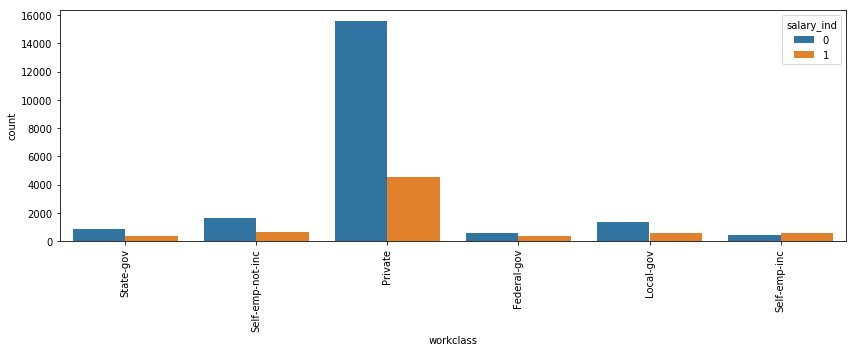

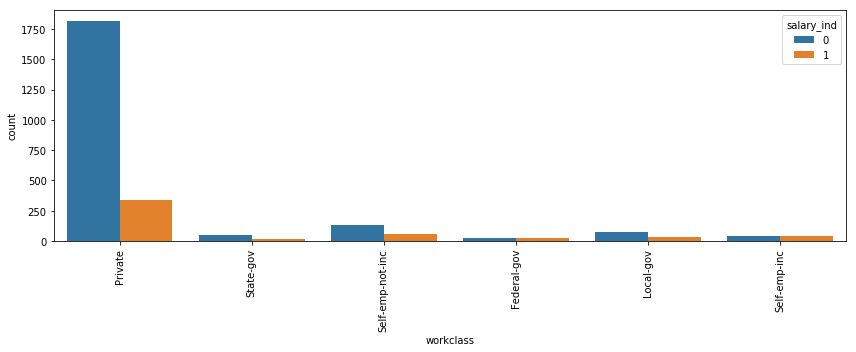

In [125]:
cntplt('workclass',adult_US,'salary_ind')
cntplt('workclass',adult_other,'salary_ind')

Inference: without pay and never worked doesn't or very minimal salaries. so they can be ignored for process 
    lets remove the without pay category all together they arent important

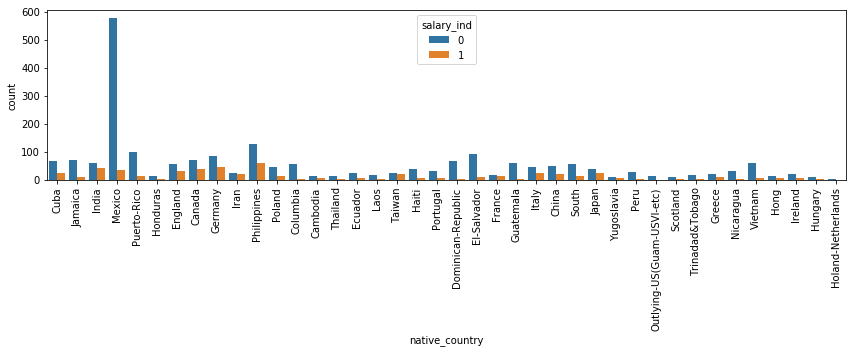

In [127]:
cntplt('native_country',adult_other,'salary_ind')

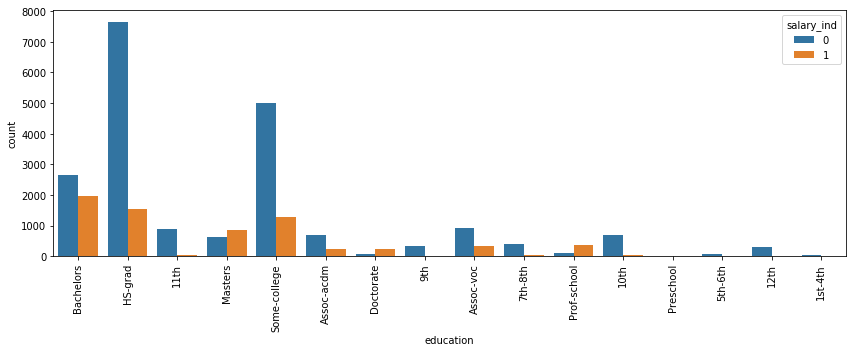

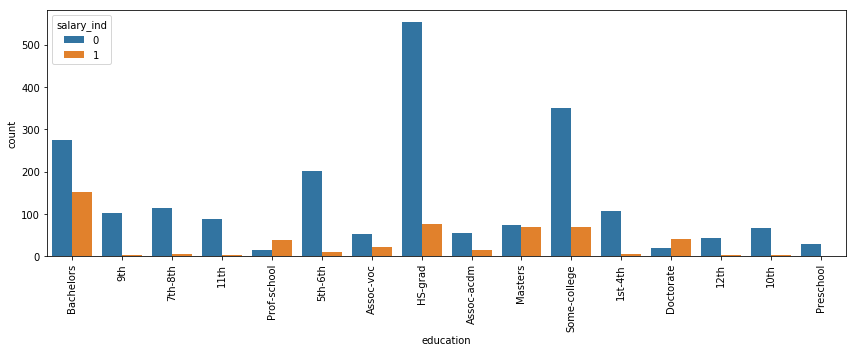

In [128]:
cntplt('education',adult_US,'salary_ind')
cntplt('education',adult_other,'salary_ind')

Inference: HS-Grad forms the major share, but bachelors, some-college also include good amount of populace, rest are small numbers

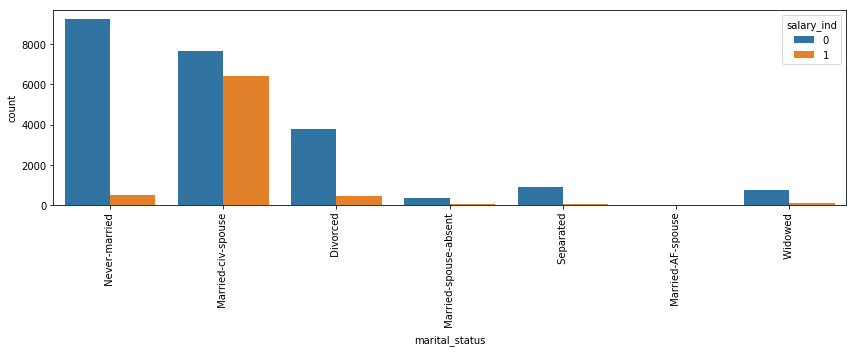

In [51]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="marital_status", data=adult_new,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Let's change the categorical columns into numbers and see

In [52]:
adult_new.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary', 'workclass_ind', 'education_ind', 'marital_status_ind',
       'occupation_ind', 'relationship_ind', 'race_ind', 'native_country_ind',
       'salary_ind'],
      dtype='object')

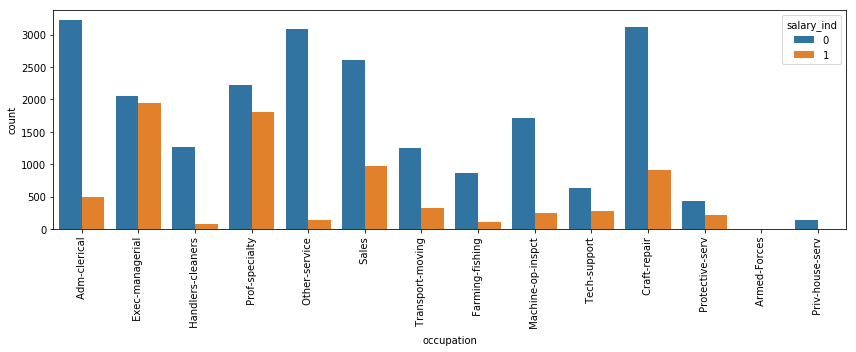

In [53]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="occupation", data=adult_new,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

armed forces have less number of records/no higher salaries

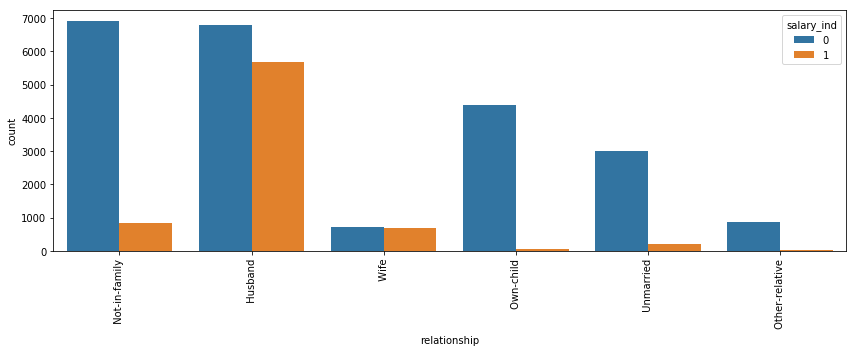

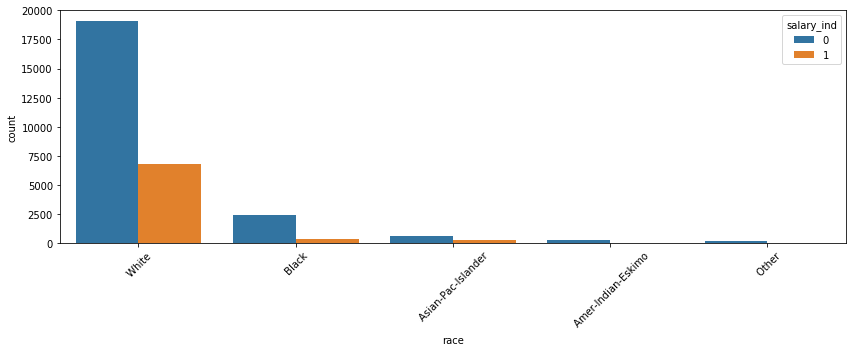

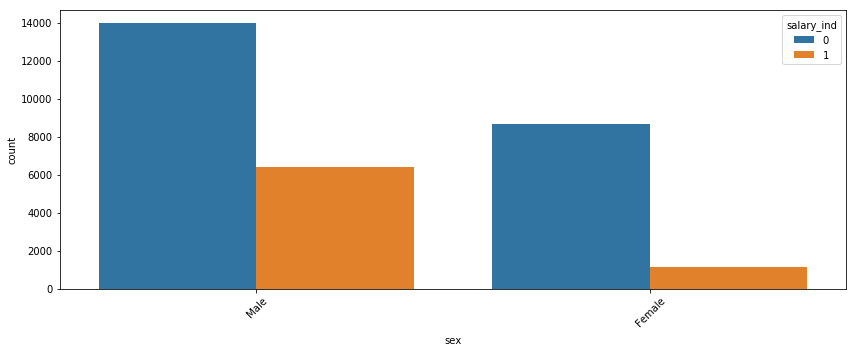

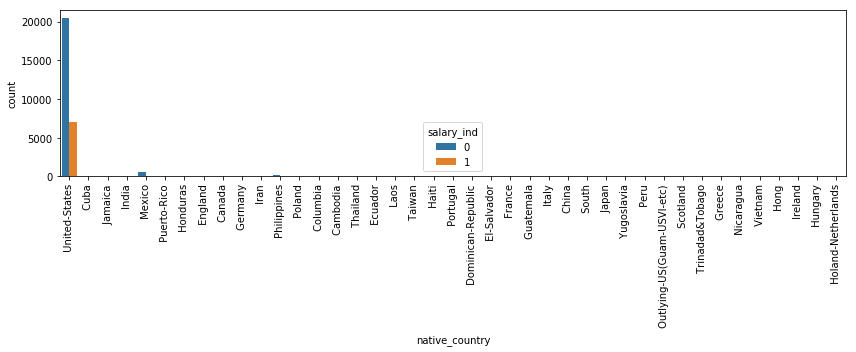

In [54]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="relationship", data=adult_new,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="race", data=adult_new,hue='salary_ind')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="sex", data=adult_new,hue='salary_ind')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



US has to be treated separately and rest all the countries have to be treated separately

Let's eliminate the non-numeric columns and create a new dataset to be used 

In [55]:
adult_new.dtypes

age                    int64
workclass             object
fnlwgt                 int64
education             object
education_num          int64
marital_status        object
occupation            object
relationship          object
race                  object
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
salary                object
workclass_ind           int8
education_ind           int8
marital_status_ind      int8
occupation_ind          int8
relationship_ind        int8
race_ind                int8
native_country_ind      int8
salary_ind              int8
dtype: object

filter only int datatypes using the below code

In [56]:
adult_num=adult_new.select_dtypes(include=['int8','int64'])

create a heat map with the variables keeping the target variable as salary_ind

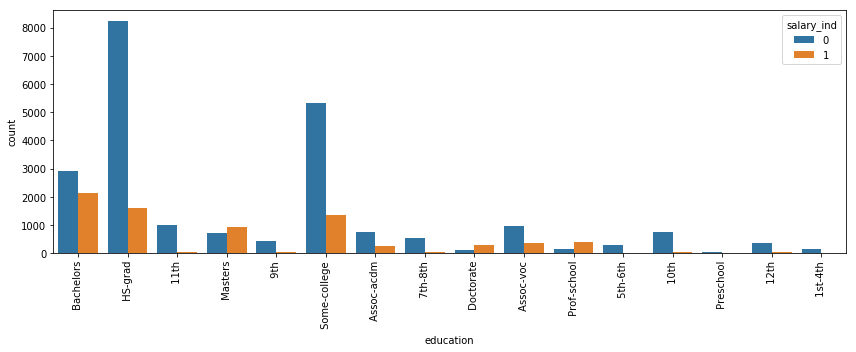

In [57]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="education", data=adult_new,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

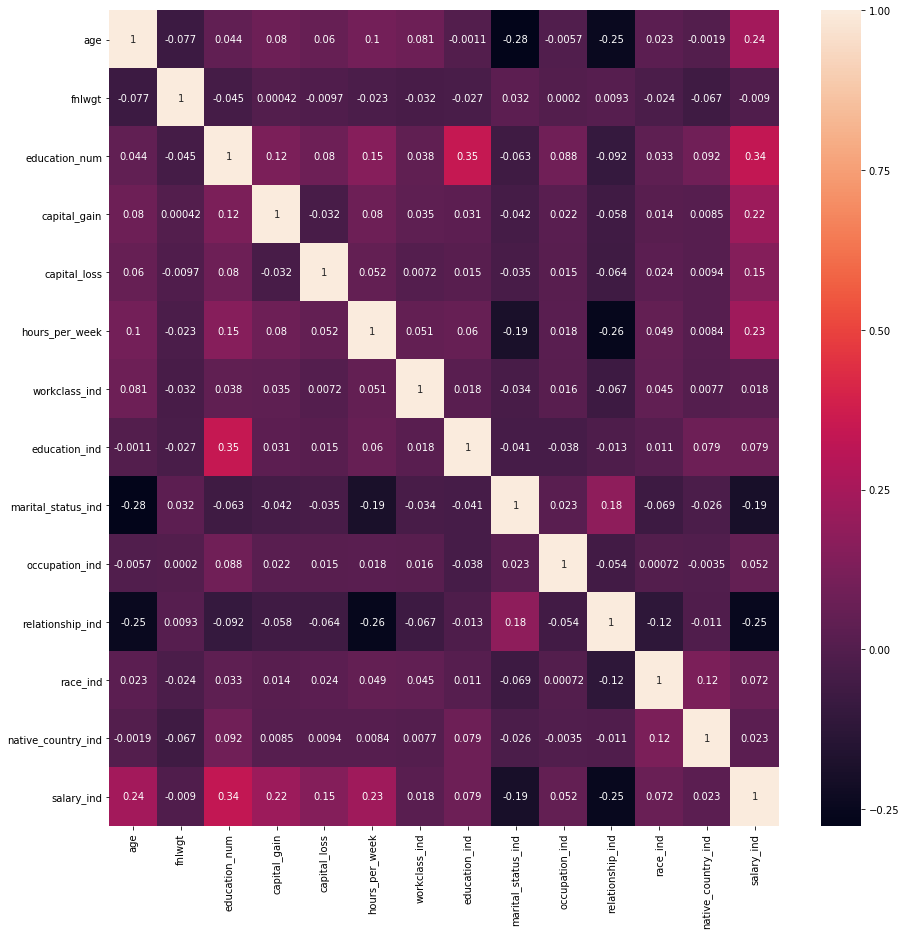

In [19]:
corr = adult_num.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
plt.show()

we need to remove duplicates before processing further

In [32]:
adult_num.count()

age                   30162
fnlwgt                30162
education_num         30162
capital_gain          30162
capital_loss          30162
hours_per_week        30162
workclass_ind         30162
education_ind         30162
marital_status_ind    30162
occupation_ind        30162
relationship_ind      30162
race_ind              30162
native_country_ind    30162
salary_ind            30162
dtype: int64

In [35]:
adult_num_dup=adult_num.drop_duplicates()

In [36]:
adult_num_dup.count()

age                   30139
fnlwgt                30139
education_num         30139
capital_gain          30139
capital_loss          30139
hours_per_week        30139
workclass_ind         30139
education_ind         30139
marital_status_ind    30139
occupation_ind        30139
relationship_ind      30139
race_ind              30139
native_country_ind    30139
salary_ind            30139
dtype: int64

In [ ]:
after duplicates are removed, we can start removing unnecessary data from dataset as well